# Nonlinear Dynamics Project: Dynamical Systems on Networks
## Athreya Chandramouli (2018121002)

### Epidemic Model
$$
\dot{x}_1=-Bx_1+ A_{1,2}R(1-x_1)x_2 + A_{1,3}R(1-x_1)x_3
$$
$$
\dot{x}_2=-Bx_2+ A_{2,1}R(1-x_2)x_1 + A_{2,3}R(1-x_2)x_3 + A_{2,4}R(1-x_2)x_4
$$
$$
\dot{x}_3=-Bx_3+ A_{3,2}R(1-x_3)x_2 + A_{3,1}R(1-x_3)x_1
$$
$$
\dot{x}_4=-Bx_4+ A_{4,2}R(1-x_4)x_2
$$


In [93]:
using DynamicalSystems, Plots

In [123]:
#Defining the ODEs
# p[1] = B, p[2] = R, p[3] = A_12, p[4] = A_13, p[5] = A_14
# p[6] = A_23, p[7] = A_24, p[8] = A_34
f(x, p, t) = SVector{4}(-p[1]*x[1] + p[3]*p[2]*(1-x[1])*x[2] + p[4]*p[2]*(1-x[1])*x[3],
                        -p[1]*x[2] + p[3]*p[2]*(1-x[2])*x[1] + p[6]*p[2]*(1-x[2])*x[3] + p[7]*p[2]*(1-x[2])*x[4],
                        -p[1]*x[3] + p[6]*p[2]*(1-x[3])*x[2] + p[4]*p[2]*(1-x[3])*x[1],
                        -p[1]*x[4] + p[7]*p[2]*(1-x[4])*x[2])

f (generic function with 1 method)

In [124]:
# Defining the initial state
state = SVector{4}(0.,0.01,0.,0.)

4-element SVector{4, Float64} with indices SOneTo(4):
 0.0
 0.01
 0.0
 0.0

In [125]:
# Providing values to the parameters
p = [0.1, 0.2, 1,1,1,1,1,1]

8-element Vector{Float64}:
 0.1
 0.2
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [97]:
system = ContinuousDynamicalSystem(f, state, p)

4-dimensional continuous dynamical system
 state:       [0.0, 0.01, 0.0, 0.0]
 rule f:      f
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.1, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [98]:
tr = trajectory(system, 10000)

4-dimensional Dataset{Float64} with 1000001 points
 0.0          0.01        0.0          0.0
 1.99998e-5   0.00999006  1.99998e-5   1.99798e-5
 3.99995e-5   0.00998026  3.99995e-5   3.99196e-5
 5.99994e-5   0.00997058  5.99994e-5   5.98195e-5
 7.99995e-5   0.00996103  7.99995e-5   7.968e-5
 0.0001       0.00995161  0.0001       9.95012e-5
 0.000120002  0.00994231  0.000120002  0.000119284
 0.000140005  0.00993314  0.000140005  0.000139027
 0.000160009  0.0099241   0.000160009  0.000158733
 0.000180015  0.00991519  0.000180015  0.0001784
 0.000200023  0.00990641  0.000200023  0.00019803
 0.000220033  0.00989775  0.000220033  0.000217622
 0.000240045  0.00988922  0.000240045  0.000237177
 ⋮                                     
 0.758282     0.810244    0.758282     0.618391
 0.758282     0.810244    0.758282     0.618391
 0.758282     0.810244    0.758282     0.618391
 0.758282     0.810244    0.758282     0.618391
 0.758282     0.810244    0.758282     0.618391
 0.758282     0.810244  

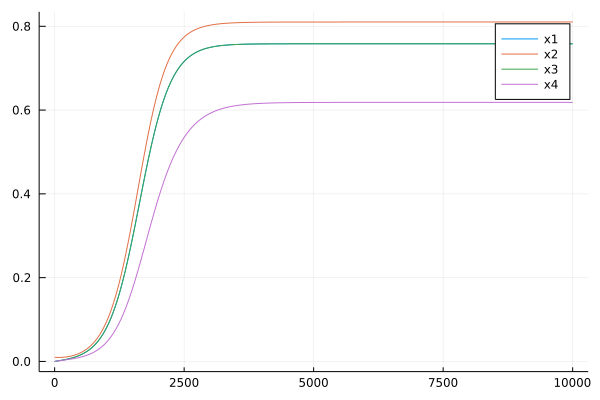

In [99]:
plotrange = 1:10000
plot(tr[plotrange,1],label="x1")
plot!(tr[plotrange,2],label="x2")
plot!(tr[plotrange,3],label="x3")
plot!(tr[plotrange,4],label="x4")


In [100]:
savefig("contact1.png")


## Subgraph Naive method
$$
\dot{x}_1=-Bx_1+ A_{1,2}R(1-x_1)x_2
$$
$$
\dot{x}_2=-Bx_2+ A_{2,1}R(1-x_2)x_1
$$


In [133]:
# p[1] = B, p[2] = R, p[3] = A_12 = A_21
f2(x, p, t) = SVector{2}(-p[1]*x[1] + p[3]*p[2]*(1-x[1])*x[2],
                         -p[1]*x[2] + p[3]*p[2]*(1-x[2])*x[1])

f2 (generic function with 1 method)

In [102]:
state2 = SVector{2}(0.,0.01)

2-element SVector{2, Float64} with indices SOneTo(2):
 0.0
 0.01

In [103]:
p2 = [0.1, 0.2, 1]

3-element Vector{Float64}:
 0.1
 0.2
 1.0

In [104]:
system2 = ContinuousDynamicalSystem(f2, state2, p2)

2-dimensional continuous dynamical system
 state:       [0.0, 0.01]
 rule f:      f2
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.1, 0.2, 1.0]


In [105]:
tr2 = trajectory(system2, 10000)

2-dimensional Dataset{Float64} with 1000001 points
 0.0          0.01
 1.99798e-5   0.00999002
 3.99194e-5   0.0099801
 5.98188e-5   0.00997022
 7.96783e-5   0.0099604
 9.94979e-5   0.00995062
 0.000119278  0.00994089
 0.000139018  0.00993121
 0.000158719  0.00992158
 0.000178381  0.00991199
 0.000198003  0.00990246
 0.000217587  0.00989297
 0.000237132  0.00988353
 ⋮            
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5
 0.5          0.5

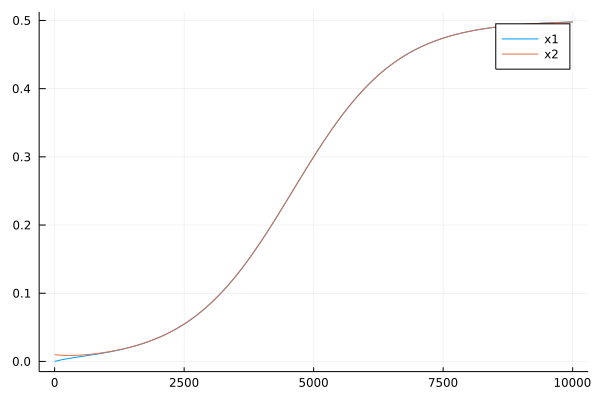

In [106]:
plotrange = 1:10000
plot(tr2[plotrange,1],label="x1")
plot!(tr2[plotrange,2],label="x2")

In [107]:
savefig("contact2.png")


## Mean Field Approximation
$$
\dot{x}_{\text{av}} = -Bx_{\text{av}} + \beta R (1-x_{\text{av}})x_{\text{av}}
$$
where $\beta = 2.6$

In [128]:
# p[1] = B, p[2] = R
f3(x, p, t) = SVector{2}(-p[1]*x[1] + 2.6*p[2]*(1-x[1])*x[1], 0)

f3 (generic function with 1 method)

In [109]:
state3 = SVector{2}(0.01,0.)

2-element SVector{2, Float64} with indices SOneTo(2):
 0.01
 0.0

In [110]:
p3 = [0.1, 0.2]

2-element Vector{Float64}:
 0.1
 0.2

In [111]:
system3 = ContinuousDynamicalSystem(f3, state3, p3)

2-dimensional continuous dynamical system
 state:       [0.01, 0.0]
 rule f:      f3
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.1, 0.2]


In [112]:
tr3 = trajectory(system3, 10000)

2-dimensional Dataset{Float64} with 1000001 points
 0.01       0.0
 0.0100416  0.0
 0.0100833  0.0
 0.0101252  0.0
 0.0101673  0.0
 0.0102095  0.0
 0.010252   0.0
 0.0102946  0.0
 0.0103373  0.0
 0.0103803  0.0
 0.0104234  0.0
 0.0104667  0.0
 0.0105102  0.0
 ⋮          
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0
 0.807692   0.0

In [130]:
# last element of the trajectory is the steady state
x_eff = tr3[10001,1]

0.8076925671636033

$$
\dot{x}_1=-Bx_1 + A_{1,2}R(1-x_1)x_2 + R(1-x_1)x_{\text{eff}}
$$
$$
\dot{x}_2=-Bx_2+ A_{2,1}R(1-x_2)x_1 + 2R(1-x_2)x_{\text{eff}}
$$


In [132]:
# p[1] = B, p[2] = R, p[3] = A_12 = A_21
f4(x, p, t) = SVector{2}(-p[1]*x[1] + p[3]*p[2]*(1-x[1])*x[2] + p[2]*(1-x[1])*x_eff,
                         -p[1]*x[2] + p[3]*p[2]*(1-x[2])*x[1] + 2*p[2]*(1-x[2])*x_eff)

f4 (generic function with 1 method)

In [115]:
state4 = SVector{2}(0.,0.01)

2-element SVector{2, Float64} with indices SOneTo(2):
 0.0
 0.01

In [116]:
p4 = [0.1, 0.2, 1]

3-element Vector{Float64}:
 0.1
 0.2
 1.0

In [117]:
system4 = ContinuousDynamicalSystem(f4, state4, p4)

2-dimensional continuous dynamical system
 state:       [0.0, 0.01]
 rule f:      f4
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.1, 0.2, 1.0]


In [118]:
tr4 = trajectory(system4, 10000)

2-dimensional Dataset{Float64} with 1000001 points
 0.0         0.01
 0.00163641  0.0131833
 0.00327484  0.0163565
 0.00491525  0.0195194
 0.00655758  0.0226721
 0.00820179  0.0258147
 0.00984785  0.0289472
 0.0114957   0.0320696
 0.0131453   0.0351819
 0.0147966   0.0382842
 0.0164495   0.0413764
 0.0181041   0.0444587
 0.0197602   0.047531
 ⋮           
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455
 0.765715    0.826455

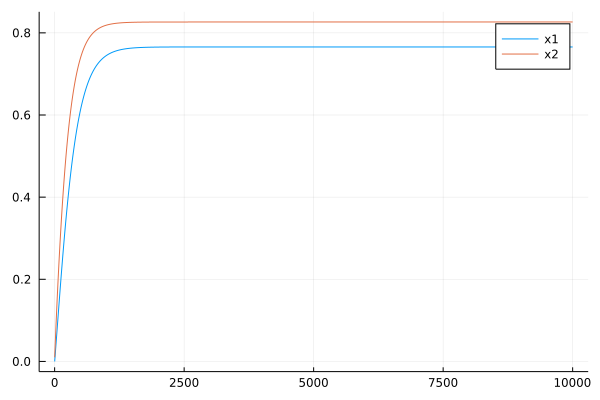

In [150]:
plotrange = 1:10000
plot(tr4[plotrange,1],label="x1")
plot!(tr4[plotrange,2],label="x2")

In [151]:
savefig("mean_field.png")


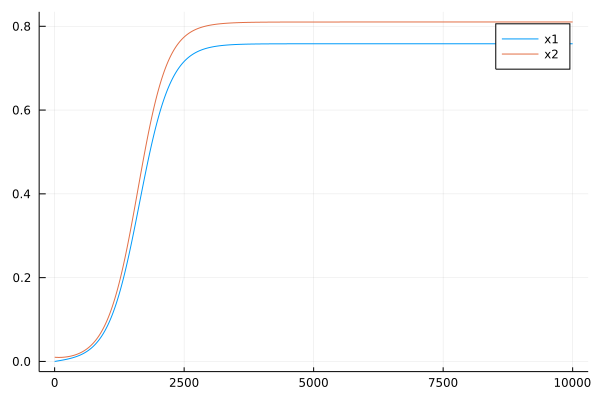

In [135]:
# Plotting the actual evolution of x1 and x2
plotrange = 1:10000
plot(tr[plotrange,1],label="x1")
plot!(tr[plotrange,2],label="x2")

In [136]:
savefig("actual.png")


In [148]:
# Comparing Squared Error b/w naive and mean field
err_mf = (tr[10001,1] - tr4[10001,1])^2 + (tr[10001,2] - tr4[10001,2])^2
err_naive = (tr[10001,1] - tr2[10001,1])^2 + (tr[10001,2] - tr2[10001,2])^2
print("Error in Mean Field Estimate: ", err_mf)
print("\nError in Naive Estimate: ", err_naive)

Error in Mean Field Estimate: 0.00031808537082434965
Error in Naive Estimate: 0.1655103920832569